In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

In [14]:
##Wavenumbers
k = 12 * np.pi
m = 6 * np.pi
m_U = 14 * np.pi #vertical wavenumber
##

r_m = 0.1
N0_squared = 100


k_e = np.sqrt(k**2 + m**2)
k_plus = np.sqrt(k**2 +(m+m_U)**2)

W_e = np.array([[-1, k / (k_e**2)],
                [-k * N0_squared, -1]])
W_plus = np.array([[-1, -k / (k_plus**2)],
                [k * N0_squared, -1]])

W = np.block([[W_e, np.zeros((2, 2))],
             [np.zeros((2, 2)), W_plus]])

L_e = np.array([[-(k*(k_plus**2 - m_U**2)) / (2 * (k_e**2)), 0],
                [0, k / 2]])

L_plus = np.array([[-(k*(m_U**2 - k_e**2)) / (2 * (k_plus**2)), 0],
                [0, -k / 2]])

L = np.block([[np.zeros((2, 2)), L_e],
             [L_plus, np.zeros((2, 2))]])

In [15]:
def euler_maruyama_general(y0, t_span, dt, determ, stoch, epsilon):
    t0, tf = t_span
    t = np.linspace(t0, tf, int((tf - t0) / dt) + 1)
    num_vars = len(y0)
    y = np.zeros((num_vars, len(t)))
    y[:, 0] = y0

    for i in range(len(t) - 1):
        noise_forcing_vector = stoch(y[:, i], dt, epsilon)
        y[:, i + 1] = y[:, i] + dt * determ(y[:, i]) + noise_forcing_vector

    return t, y

# Define your drift and diffusion functions for the specific problem
def determ(y):
    s = y[:4]
    U = y[4]
    return np.concatenate((W @ s + U * (L @ s), [(0.25 * k * (k_plus**2 - k_e**2) * s[0] * s[2]) - (r_m * U)]))

def stoch(y, dt, epsilon):
    noise_forcing = np.sqrt(dt) * (2 * np.sqrt(2) / k_e) * np.random.normal(0, 1)
    noise_forcing_vector = np.array([noise_forcing, 0, 0, 0, 0])
    return np.sqrt(epsilon) * noise_forcing_vector


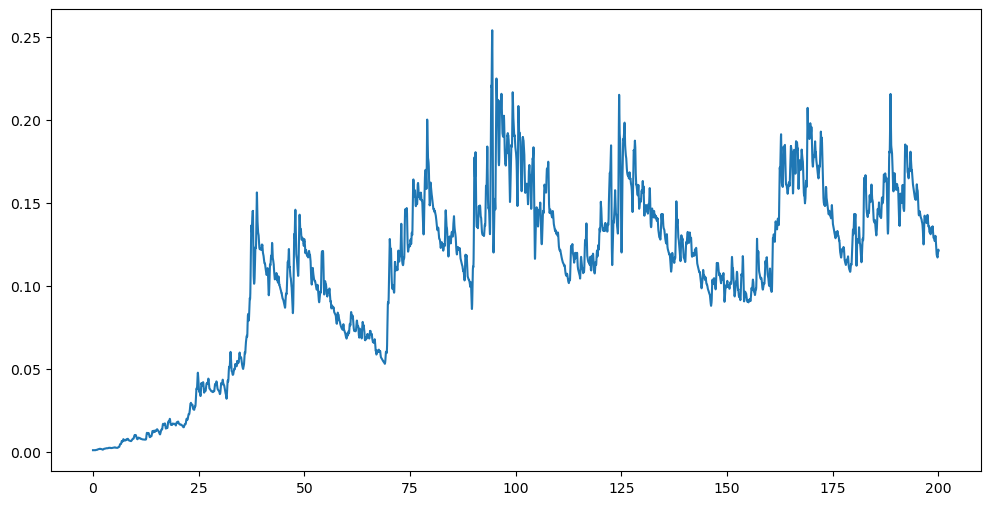

In [17]:
# Usage example
y0 = np.array([0, 0, 0, 0, 0.001])  # Initial conditions
t_span = (0, 200)  # Time span
dt = 0.001  # Time step
epsilon = 0.01  # Noise level

t, y = euler_maruyama_general(y0, t_span, dt, determ, stoch, epsilon)
plt.figure(figsize=(12, 6))
plt.plot(t, y[4],'-')